In this notebook we will do some data exploration and preprocessing for both **RSRP** and **TrafficVolume** datasets

# **Importing libraries**

In [ ]:
import io
import pandas as pd   
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from google.colab import files
import os

# **Reading the data**

In [ ]:
drive.mount('/content/gdrive')
root_path1 = '/content/gdrive/My Drive/Ericsson_DS_challenge'

Mounted at /content/gdrive


In [ ]:
os.chdir(root_path1) #change current working directory
print(os.getcwd())

/content/gdrive/My Drive/Ericsson_DS_challenge


In [ ]:
#Reading RSRP dataset
rsrp = pd.read_csv('RSRP.csv')
rsrp.head()

,Timestamp,LocationLatitude,LocationLongitude,RadioConnectionType,Country,RadioNetworkGeneration,RadioOperatorName,RSRP,RadioMobileDataEnabled,DeviceManufacturer,DeviceName
0,2019-11-02 00:09:29.386 +0300,24.54054,46.784737,Mobile,Saudi Arabia,4G,Operator C,2147483647,Enabled,HTC,D728W
1,2019-11-02 00:09:29.386 +0300,24.54054,46.784737,Mobile,Saudi Arabia,4G,Operator C,2147483647,Enabled,HTC,Desire 728 Dual Sim
2,2019-11-02 00:10:45.323 +0300,24.54054,46.784737,Mobile,Saudi Arabia,3G,Operator C,2147483647,Enabled,HTC,D728W
3,2019-11-02 00:10:45.323 +0300,24.54054,46.784737,Mobile,Saudi Arabia,3G,Operator C,2147483647,Enabled,HTC,Desire 728 Dual Sim
4,2019-11-02 00:11:26.822 +0300,24.54054,46.784737,Mobile,Saudi Arabia,4G,Operator C,2147483647,Enabled,HTC,D728W


In [ ]:
#Reading traffic dataset
traffic = pd.read_csv('TrafficVolume.csv')
traffic.head()

,Timestamp,LocationLatitude,LocationLongitude,RadioConnectionType,Country,RadioNetworkGeneration,RadioOperatorName,TrafficDirection,TrafficVolume,RadioMobileDataEnabled
0,2019-11-02 00:45:00.000 +0300,24.636574,46.710026,Mobile,Saudi Arabia,3G,Operator A,Downlink,14.957630,Enabled
1,2019-11-02 00:45:00.000 +0300,24.636124,46.711742,Mobile,Saudi Arabia,3G,Operator A,Uplink,0.304565,Enabled
2,2019-11-02 00:00:00.000 +0300,24.636728,46.710230,Mobile,Saudi Arabia,3G,Operator A,Downlink,20.965813,Enabled
3,2019-11-02 00:00:00.000 +0300,24.636705,46.710243,Mobile,Saudi Arabia,3G,Operator A,Uplink,0.706546,Enabled
4,2019-11-02 02:00:00.000 +0300,24.718973,46.805927,Mobile,Saudi Arabia,4G,Operator B,Uplink,1.471874,Enabled


# **RSRP Exploration and cleaning**

First let's check how many observations and features for the dataset

In [ ]:
rsrp.shape

(2725353, 11)

The rsrp dataset has 2,725,353 observation with 11 features

In [ ]:
#Now we will check columns types
rsrp.dtypes

Timestamp                  object
LocationLatitude          float64
LocationLongitude         float64
RadioConnectionType        object
Country                    object
RadioNetworkGeneration     object
RadioOperatorName          object
RSRP                        int64
RadioMobileDataEnabled     object
DeviceManufacturer         object
DeviceName                 object
dtype: object

In [ ]:
#Let's explore the object type columns in more details
rsrp.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

Timestamp                 1986303
RadioConnectionType             3
Country                         1
RadioNetworkGeneration          5
RadioOperatorName               3
RadioMobileDataEnabled          2
DeviceManufacturer             29
DeviceName                    292
dtype: int64

As we can see we have only 1 country in the dataset which is Saudi Arabia so we can remove this column entirely

In [ ]:
rsrp = rsrp.drop(columns="Country")

In [ ]:
rsrp.head()

,Timestamp,LocationLatitude,LocationLongitude,RadioConnectionType,RadioNetworkGeneration,RadioOperatorName,RSRP,RadioMobileDataEnabled,DeviceManufacturer,DeviceName
0,2019-11-02 00:09:29.386 +0300,24.54054,46.784737,Mobile,4G,Operator C,2147483647,Enabled,HTC,D728W
1,2019-11-02 00:09:29.386 +0300,24.54054,46.784737,Mobile,4G,Operator C,2147483647,Enabled,HTC,Desire 728 Dual Sim
2,2019-11-02 00:10:45.323 +0300,24.54054,46.784737,Mobile,3G,Operator C,2147483647,Enabled,HTC,D728W
3,2019-11-02 00:10:45.323 +0300,24.54054,46.784737,Mobile,3G,Operator C,2147483647,Enabled,HTC,Desire 728 Dual Sim
4,2019-11-02 00:11:26.822 +0300,24.54054,46.784737,Mobile,4G,Operator C,2147483647,Enabled,HTC,D728W


In [ ]:
# let's further check RadioConnectionType column
rsrp['RadioConnectionType'].value_counts()

Mobile     2717295
WiFi          7390
Unknown        668
Name: RadioConnectionType, dtype: int64

As we are concerned with 4G Mobile network performance so we can ignore reading related to WiFi and the unknown reading which both combined represent around 0.2% of the data

In [ ]:
rsrp = rsrp[rsrp['RadioConnectionType'] == 'Mobile']

Now we only Mobile as radioConnection type but let's confirm

In [ ]:
rsrp['RadioConnectionType'].value_counts()

Mobile    2717295
Name: RadioConnectionType, dtype: int64

Now as we have only 1 type of RadioConnectionType in the dataset which is Mobile we can remove this column entirely

In [ ]:
rsrp = rsrp.drop(columns="RadioConnectionType")

In [ ]:
rsrp.shape

(2717295, 9)

Next let's examine **RadioNetworkGeneration** column

In [ ]:
rsrp['RadioNetworkGeneration'].value_counts()

4G         2250976
3G          443676
Unknown      17322
2G            5320
WiFi             1
Name: RadioNetworkGeneration, dtype: int64

First of all we need to highlight 2 points the first one is we are focusing on 4G KPIs and secondly RSRP is 4G measurement of coverage so If we checked 3G/2G rows we shouldn't find corresponding RSRP

In [ ]:
rsrp[rsrp['RadioNetworkGeneration'] != '4G']['RSRP'].value_counts()

 2147483647    455192
-86              1955
-103              988
-85               797
-78               654
                ...  
-131                1
-130                1
-127                1
-54                 1
-1                  1
Name: RSRP, Length: 85, dtype: int64

In [ ]:
rsrp[rsrp['RadioNetworkGeneration'] != '4G']['RSRP'].value_counts()[2147483647]/rsrp[rsrp['RadioNetworkGeneration'] != '4G']['RSRP'].count()

0.9761386518670695

As we can see above around 97.6% of the non 4G mobile readings reported RSRP of 2147483647 which is quite large. When we serached for this value we found it represents invalid values which is logic in case you don't use 4G(2G, 3G or Wifi is used)

Based on the above we can delete all non-4G observations to keep focusing on 4G KPIs

In [ ]:
rsrp = rsrp[rsrp['RadioNetworkGeneration'] == '4G']

In [ ]:
rsrp['RadioNetworkGeneration'].value_counts()

4G    2250976
Name: RadioNetworkGeneration, dtype: int64

Now as we have only 1 type of RadioNetworkGeneration in the dataset which is 4G we can remove the entire column

In [ ]:
rsrp = rsrp.drop(columns="RadioNetworkGeneration")

In [ ]:
rsrp.shape

(2250976, 8)

In [ ]:
rsrp.head()

,Timestamp,LocationLatitude,LocationLongitude,RadioOperatorName,RSRP,RadioMobileDataEnabled,DeviceManufacturer,DeviceName
0,2019-11-02 00:09:29.386 +0300,24.54054,46.784737,Operator C,2147483647,Enabled,HTC,D728W
1,2019-11-02 00:09:29.386 +0300,24.54054,46.784737,Operator C,2147483647,Enabled,HTC,Desire 728 Dual Sim
4,2019-11-02 00:11:26.822 +0300,24.54054,46.784737,Operator C,2147483647,Enabled,HTC,D728W
5,2019-11-02 00:11:26.822 +0300,24.54054,46.784737,Operator C,2147483647,Enabled,HTC,Desire 728 Dual Sim
30,2019-11-02 00:30:18.278 +0300,24.54054,46.784737,Operator C,2147483647,Enabled,HTC,D728W


Now we can check the different operators we have in the dataset

In [ ]:
rsrp['RadioOperatorName'].value_counts()

Operator A    1180110
Operator C     544389
Operator B     526477
Name: RadioOperatorName, dtype: int64

The different Manufacturers are as below

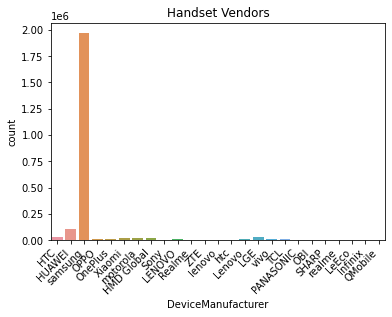

In [ ]:
cntplot = sns.countplot(x="DeviceManufacturer", data=rsrp)
cntplot.set_xticklabels(cntplot.get_xticklabels(), rotation=45, horizontalalignment='right')
cntplot.set_title('Handset Vendors')
plt.show()

Most of the handsets are samsung

## **Missing vaules checking**

In [ ]:
#We will find the percentage of null values compared to total values for each column
rsrp_percent = 100 * rsrp.isnull().sum() / len(rsrp)
#We will formulate train_percent into dataframe
rsrp_percent = rsrp_percent.to_frame().reset_index()
#We will rename the columns
rsrp_percent.columns= ["Feature","Null Percentage"]
#Finally let's sort the percentage from higher to lower
rsrp_percent.sort_values(by=['Null Percentage'],ascending=False)

,Feature,Null Percentage
0,Timestamp,0.0
1,LocationLatitude,0.0
2,LocationLongitude,0.0
3,RadioOperatorName,0.0
4,RSRP,0.0
5,RadioMobileDataEnabled,0.0
6,DeviceManufacturer,0.0
7,DeviceName,0.0


We don't have Null values for any of the remaining 8 columns; However, we can further check If we have anomalies in the continious features we have.

## **Continuous variables exploration**

In [ ]:
pd.set_option('float_format', '{:f}'.format)
rsrp.describe()

,LocationLatitude,LocationLongitude,RSRP
count,2250976.000000,2250976.000000,2250976.000000
mean,24.696788,46.713296,178098908.472163
std,0.092889,0.073104,592237784.782480
min,24.434656,46.356922,-140.000000
25%,24.603823,46.673850,-92.000000
50%,24.697622,46.707220,-82.000000
75%,24.769081,46.759743,-72.000000
max,25.036217,47.180670,2147483647.000000


For **LocationLatitude** and **LocationLongitude** the values seem to be normal unlike **RSRP** values which have minimum value of -140 which is accpetable and maximum value of 2147483647 which is discussed earlier represent invalid value so let's investigate this column more

In [ ]:
rsrp['RSRP'].value_counts()

 2147483647    186682
-107           103067
-83             97690
-71             91855
-79             63922
                ...  
-135                1
-136                1
-138                1
 12                 1
-1                  1
Name: RSRP, Length: 99, dtype: int64

In [ ]:
rsrp['RSRP'].value_counts()[2147483647]/rsrp['RSRP'].count()

0.08293380293703709

As we can see around 8% of RSRP values are invalid (value is 2147483647) but we noticed that sometimes RSRP value is 12 which is invalid as well so we need to know how often the value of RSRP are invalid and wasn't set as 2147483647

In [ ]:
rsrp[(rsrp['RSRP'] > -40) & (rsrp['RSRP'] != 2147483647)]

,Timestamp,LocationLatitude,LocationLongitude,RadioOperatorName,RSRP,RadioMobileDataEnabled,DeviceManufacturer,DeviceName
9835,2019-11-02 14:22:30.111 +0300,24.831696,46.609013,Operator A,0,Enabled,HUAWEI,Y6Ii
9842,2019-11-02 14:23:09.043 +0300,24.831696,46.608990,Operator A,0,Enabled,HUAWEI,Y6Ii
9843,2019-11-02 14:23:10.047 +0300,24.831696,46.608990,Operator A,0,Enabled,HUAWEI,Y6Ii
9844,2019-11-02 14:23:15.007 +0300,24.831718,46.608960,Operator A,0,Enabled,HUAWEI,Y6Ii
9846,2019-11-02 14:23:36.039 +0300,24.832392,46.610115,Operator A,0,Enabled,HUAWEI,Y6Ii
...,...,...,...,...,...,...,...,...
2716148,2019-11-03 16:59:34.031 +0300,24.664839,46.732090,Operator A,0,Enabled,HUAWEI,Y6Ii
2716149,2019-11-03 16:59:54.026 +0300,24.664122,46.733006,Operator A,0,Enabled,HUAWEI,Y6Ii
2716150,2019-11-03 16:59:56.021 +0300,24.664045,46.733050,Operator A,0,Enabled,HUAWEI,Y6Ii
2716151,2019-11-03 17:00:00.027 +0300,24.663939,46.733112,Operator A,0,Enabled,HUAWEI,Y6Ii


Only 431 observations and we can observe that most of them are for Huawei Y6li so let's confirm this point

In [ ]:
rsrp[(rsrp['RSRP'] > -40) & (rsrp['RSRP'] != 2147483647)]['DeviceName'].value_counts()

Y6Ii               426
Mate 7               3
Huawei P30 Lite      1
Droid Turbo 2        1
Name: DeviceName, dtype: int64

Almost all the obervations are related to Y6li so this is possibly due to malfunction in the device in the certain scenario and as number of observations are very low we can remove them.

In [ ]:
rsrp = rsrp[(rsrp['RSRP'] <= -40) | (rsrp['RSRP'] == 2147483647)]

In [ ]:
rsrp.shape

(2250545, 8)

In [ ]:
rsrp[(rsrp['RSRP'] > -40) & (rsrp['RSRP'] != 2147483647)]

,Timestamp,LocationLatitude,LocationLongitude,RadioOperatorName,RSRP,RadioMobileDataEnabled,DeviceManufacturer,DeviceName


Now the only invalid value for RSRP is **2147483647** so let's first before deciding what to do with these observation check whether it is related to certain vendor or handset type.

In [ ]:
rsrp['RSRP'].value_counts()

 2147483647    186682
-107           103067
-83             97690
-71             91855
-79             63922
                ...  
-132                3
-45                 3
-135                1
-136                1
-138                1
Name: RSRP, Length: 96, dtype: int64

In [ ]:
rsrp[rsrp['RSRP'] == 2147483647]['DeviceManufacturer'].value_counts()

samsung       173919
motorola        3979
LENOVO          2466
lenovo          2353
HUAWEI          1385
HTC              820
HMD Global       567
LGE              476
Xiaomi           223
OPPO             144
Lenovo           104
TCL               68
vivo              67
htc               40
Sony              25
PANASONIC         14
Infinix            8
OBI                8
QMobile            8
Realme             6
SHARP              2
Name: DeviceManufacturer, dtype: int64

In [ ]:
rsrp[rsrp['RSRP'] == 2147483647]['DeviceName'].value_counts()

Galaxy Note4        20902
Galaxy A7(2017)     15251
Galaxy On7 Prime    14574
Galaxy J3(2016)     12787
Galaxy J7 Prime     11919
                    ...  
P8 Lite                 1
Honor View20            1
Galaxy Note10           1
Huawei Gr5 2017         1
Mi Max 2                1
Name: DeviceName, Length: 213, dtype: int64

The invalid value isn't related to a certain handset type so in order to make visualizations more definitive and also to avoid putting such huge outlier while training certain ML model we can remove these observations(around 8% of the data) noting that we can impute these values with KNN, median or any other method but for simplcity let's remove these rows.

In [ ]:
rsrp = rsrp[rsrp['RSRP'] != 2147483647]

In [ ]:
rsrp.shape

(2063863, 8)

Now we can say **rsrp** dataset is ready for data visualization step in addition to ML modeling. Although **Timestamp** column is in string format and may need more preprocessing later, we will leave it as it is for now and use Tableau for conversion to date in case of data visualization.

## **Saving rsrp dataframe to CSV**

In [ ]:
rsrp.to_csv('/content/gdrive/My Drive/Ericsson_DS_challenge/RSRP_processed.csv',index = False)

# **TrafficVolume Exploration and cleaning**

First let's check how many observations and features for the dataset

In [ ]:
traffic.shape

(138469, 10)

The TrafficVolume dataset has 138469 observations with 10 features

In [ ]:
#Now we will check columns types
traffic.dtypes

Timestamp                  object
LocationLatitude          float64
LocationLongitude         float64
RadioConnectionType        object
Country                    object
RadioNetworkGeneration     object
RadioOperatorName          object
TrafficDirection           object
TrafficVolume             float64
RadioMobileDataEnabled     object
dtype: object

In [ ]:
#Let's explore the object type columns in more details
traffic.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

Timestamp                 805
RadioConnectionType         2
Country                     1
RadioNetworkGeneration      5
RadioOperatorName           3
TrafficDirection            2
RadioMobileDataEnabled      2
dtype: int64

Like we did in **rsrp** dataset we will remove country column as all observations are in the same country Saudi Arabia

In [ ]:
traffic = traffic.drop(columns="Country")
traffic.head()

,Timestamp,LocationLatitude,LocationLongitude,RadioConnectionType,RadioNetworkGeneration,RadioOperatorName,TrafficDirection,TrafficVolume,RadioMobileDataEnabled
0,2019-11-02 00:45:00.000 +0300,24.636574,46.710026,Mobile,3G,Operator A,Downlink,14.957630,Enabled
1,2019-11-02 00:45:00.000 +0300,24.636124,46.711742,Mobile,3G,Operator A,Uplink,0.304565,Enabled
2,2019-11-02 00:00:00.000 +0300,24.636728,46.710230,Mobile,3G,Operator A,Downlink,20.965813,Enabled
3,2019-11-02 00:00:00.000 +0300,24.636705,46.710243,Mobile,3G,Operator A,Uplink,0.706546,Enabled
4,2019-11-02 02:00:00.000 +0300,24.718973,46.805927,Mobile,4G,Operator B,Uplink,1.471874,Enabled


For **RadioConnectionType** we will do the same as **rsrp** dataset as we will include only Mobile category and delete WiFi then we can delete the column itself as it has only 1 category.

In [ ]:
traffic['RadioConnectionType'].value_counts()

Mobile    136425
WiFi        2044
Name: RadioConnectionType, dtype: int64

In [ ]:
traffic = traffic[traffic['RadioConnectionType'] == 'Mobile']

In [ ]:
traffic['RadioConnectionType'].value_counts()

Mobile    136425
Name: RadioConnectionType, dtype: int64

In [ ]:
traffic = traffic.drop(columns="RadioConnectionType")

In [ ]:
traffic.shape

(136425, 8)

Now we will do the same for **RadioNetworkGeneration** column by selecting only 4G observations then delete the whole column as it will have only 1 category

In [ ]:
traffic['RadioNetworkGeneration'].value_counts()

4G    102586
3G     32334
2G      1505
Name: RadioNetworkGeneration, dtype: int64

In [ ]:
traffic = traffic[traffic['RadioNetworkGeneration'] == '4G']
traffic['RadioNetworkGeneration'].value_counts()

4G    102586
Name: RadioNetworkGeneration, dtype: int64

In [ ]:
traffic = traffic.drop(columns="RadioNetworkGeneration")
traffic.shape

(102586, 7)

Now we can check the different operators we have in the dataset

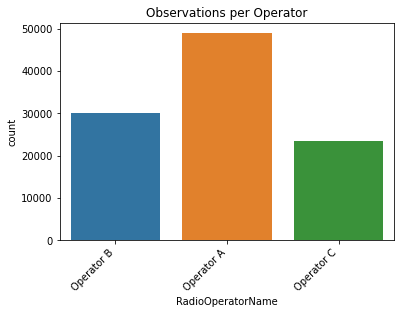

In [ ]:
cntplot = sns.countplot(x="RadioOperatorName", data=traffic)
cntplot.set_xticklabels(cntplot.get_xticklabels(), rotation=45, horizontalalignment='right')
cntplot.set_title('Observations per Operator')
plt.show()

## **Missing values checking**

In [ ]:
#We will find the percentage of null values compared to total values for each column
traffic_percent = 100 * traffic.isnull().sum() / len(traffic)
#We will formulate train_percent into dataframe
traffic_percent = traffic_percent.to_frame().reset_index()
#We will rename the columns
traffic_percent.columns= ["Feature","Null Percentage"]
#Finally let's sort the percentage from higher to lower
traffic_percent.sort_values(by=['Null Percentage'],ascending=False)

,Feature,Null Percentage
0,Timestamp,0.0
1,LocationLatitude,0.0
2,LocationLongitude,0.0
3,RadioOperatorName,0.0
4,TrafficDirection,0.0
5,TrafficVolume,0.0
6,RadioMobileDataEnabled,0.0


We don't have Null values for any of the remaining 7 columns; However, we can further check If we have anomalies in the contenious features we have.

## **Contnious variables exploration**

In [ ]:
traffic.describe()

,LocationLatitude,LocationLongitude,TrafficVolume
count,102586.000000,102586.000000,102586.000000
mean,24.688096,46.729017,29.992131
std,0.097416,0.089524,1233.789349
min,24.435455,46.358420,0.001060
25%,24.612854,46.670923,0.189269
50%,24.684134,46.721710,0.742285
75%,24.759370,46.790030,3.561909
max,25.034151,47.178978,104022.000000


For LocationLatitude and LocationLongitude the values seem to be normal unlike TrafficVolume values which have minimum value of -0.001060 which is accpetable and maximum value of 104022 MB which is somehow high so let's further investigate this column

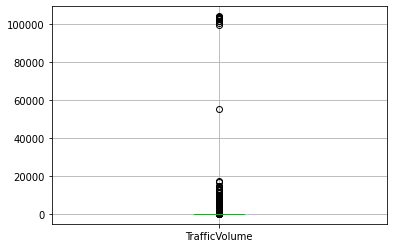

In [ ]:
traffic.boxplot(column=['TrafficVolume'])

As we can see we have readings under 20000 MB and some outlier readings at around 100,000MB and for the high readings it supposed to be for downlink traffic so let's double confirm.

In [ ]:
traffic['TrafficVolume'][traffic['TrafficVolume'] > 50000].count()

15

In [ ]:
traffic[traffic['TrafficVolume'] > 50000]

,Timestamp,LocationLatitude,LocationLongitude,RadioOperatorName,TrafficDirection,TrafficVolume,RadioMobileDataEnabled
12042,2019-11-02 01:00:00.000 +0300,24.600353,46.704693,Operator B,Downlink,99447.890395,Enabled
28810,2019-11-02 23:00:00.000 +0300,24.581163,46.742718,Operator B,Downlink,101282.000000,Enabled
43101,2019-11-03 19:00:00.000 +0300,24.787050,46.733547,Operator A,Downlink,55354.226097,Enabled
62041,2019-11-03 00:15:00.000 +0300,24.557735,46.574790,Operator B,Downlink,101378.000000,Enabled
62056,2019-11-02 18:30:00.000 +0300,24.565298,46.641380,Operator B,Downlink,100592.000000,Enabled
113042,2019-11-04 20:30:00.000 +0300,24.573608,46.635086,Operator B,Downlink,103740.000000,Enabled
131948,2019-11-03 21:15:00.000 +0300,24.572857,46.636147,Operator B,Downlink,102404.000000,Enabled
131961,2019-11-03 21:30:00.000 +0300,24.572857,46.636147,Operator B,Downlink,102407.000000,Enabled
131963,2019-11-03 18:45:00.000 +0300,24.573120,46.635387,Operator B,Downlink,102325.000000,Enabled
131982,2019-11-04 14:30:00.000 +0300,24.610582,46.728767,Operator B,Downlink,103291.000000,Enabled


As we can see we have only 15 observations with Traffic Volume more than 50000 MB(50 GB) and as expected all of these observations are in the downlink direction and also all of them are done by users of operator B. Downloading 50Gb or more from Mobile Device is unusual action specially that most of the devices memory is less than 100GB and at the same time even for streaming activity 100GB is quite large and it is highly unlikely the user will continue their download or it will last for so long. I expect this reading to be like an error in the device or the user will realize how much time and device resoureces it will take to do the operation and cancel it. Regardless the reason of these readings I believe it is better to remove them from our processed dataset. 

In [ ]:
traffic['TrafficVolume'].count()

102586

In [ ]:
traffic = traffic[traffic['TrafficVolume'] < 50000]

In [ ]:
traffic['TrafficVolume'].count()

102571

In [ ]:
traffic.shape

(102571, 7)

## **Saving traffic dataframe to CSV**

In [ ]:
traffic.to_csv('/content/gdrive/My Drive/Ericsson_DS_challenge/TrafficVolume_processed.csv',index = False)